======================================================================================================================
 
|**ASSIGNMENT 1 MEMO:**         | **Total:**           |**Duration:**      |
|-------------------------|----------------------|-------------------|
|Machine Learning 382     |60 marks            | 90 minutes       |

___

|**Lecturer:**     |
| ---------------- | 
|  IGWE K.      |  

| **NOTE:** _There are many ways to do the same thing. This is just one of them_ |
|-----------------------|

======================================================================================================================


**In this problem, you will perform exploratory data analysis (EDA) on the Auto data set provided.**
- Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its mean, otherwise 0.
- Explore the data to investigate the association between mpg01 and the other features.
- Which of the other features seem most likely to be useful in predicting mpg01 and interpret the results? Correlation matrix and boxplots may be useful tools to answer this question.
- Split the data into a training set and a test set.


- **Structure of the Assignemt :**
1. Importing Dependencies (library & packages)
2. Data Preparation --> (Load And Check Data)
3. Data Exploration & Analysis
4. Data Partitioning & Feature scaling
- **The idea is to get hands on experience with EDA**

**Data Reference:**
- Dataset: UCI Machine Learning Repository
- Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

======================================================================================================================

# Cleaning the data

In [1]:
#We have explained these imports and what they do
#For data manipulations
import numpy as np
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import functools

#From ML frameworks for easy implementation of some functions
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [2]:
#Getting dataset
dataset = pd.read_csv('auto-mpg.csv')
dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
# appears as if we do not have any missing value. Pay attention to this
dataset.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [4]:
# Now use info. Notice the variable with object data type. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### We notice that horsepower - a numerical value - is of type 'object'

In [5]:
#view the values that are not digit
def view_non_digit(dataset, column):
    dataset_hp = dataset[dataset[column].apply(lambda y: not y.isdigit())]
    return dataset_hp.head()
    
view_non_digit(dataset, "horsepower")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [6]:
#Replace with nan and impute
dataset["horsepower"] = dataset.horsepower.apply(lambda y: np.nan if y == '?' else y)


In [7]:
print(dataset.shape)
print(dataset.count())
print(dataset.info())
#Double check for missing data. Now you see the missing values
dataset.isnull().sum()


(398, 9)
mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model           398
origin          398
car             398
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [8]:
#Check for unique values
dataset.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model            13
origin            3
car             305
dtype: int64

In [9]:
#Drop irrelevant
#car and origin and model is not relevant as this needs to be applied generally
dataset = dataset.drop(["model", "origin", "car"], axis=1)
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [10]:

#Check for missing data
#Replacing the missing values based on the mean of the column.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 

#Fitting our dataset to this imputer
#Numerical first
dataset_imputed = imputer.fit_transform(dataset)
dataset = pd.DataFrame(dataset_imputed, columns = dataset.columns)

In [11]:
#Correcting datatype
print(dataset.shape)
print(dataset.count())
dataset['horsepower'] = dataset['horsepower'].apply(pd.to_numeric) 
dataset.dtypes

(398, 6)
mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
dtype: int64


mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

In [12]:
# create the label (note: a numpy array)
dataset_Y = np.where(dataset['mpg'] > dataset['mpg'].mean(), 1, 0)

#Use this to add the label to the dataframe. 
dataset["mpg01"] = dataset_Y 
#But do we need to do this if we will need to separate them? 
#We may not but I want to use it as hue in mu pairplot don't!

In [13]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg01
0,18.0,8.0,307.0,130.0,3504.0,12.0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,0


In [14]:
#check for duplicate
duplicate = dataset[dataset.duplicated()]
duplicate.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg01
29,27.0,4.0,97.0,88.0,2130.0,14.5,1


In [15]:
#drop duplicate rows
dataset = dataset.drop_duplicates()
print(dataset.shape)
print(dataset.count())

(397, 7)
mpg             397
cylinders       397
displacement    397
horsepower      397
weight          397
acceleration    397
mpg01           397
dtype: int64


# Analysis

In [16]:
#Box plots, scatterplots, measure linear association, correlation coefficient
#Use markdown to describe this

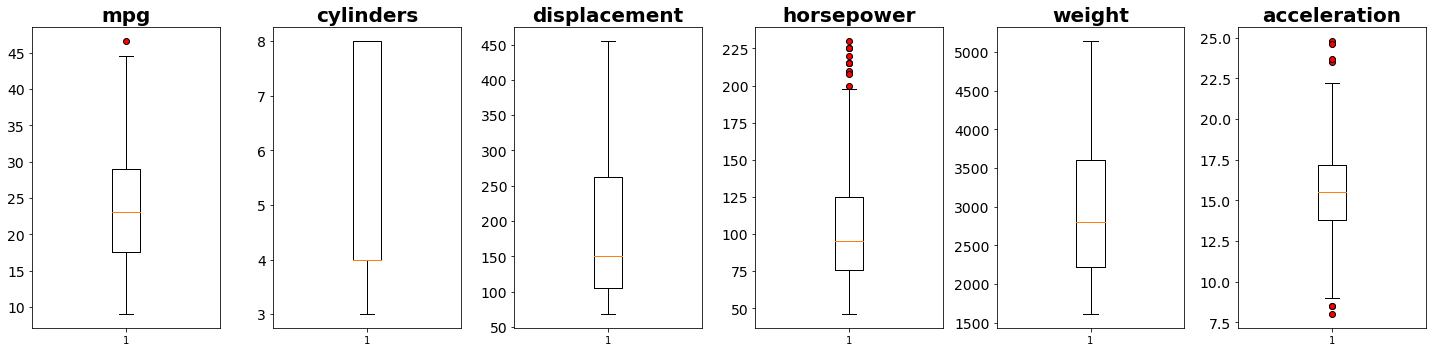

In [17]:
def boxplot (dataset):
    out = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor='black')
    fig, axs = plt.subplots(1,len(dataset.columns), figsize = (20,5))
    for i, ax in enumerate(axs.flat):
        ax.boxplot(dataset.iloc[:,i], flierprops = out)
        ax.set_title(dataset.columns[i], fontsize = 20, fontweight = 'bold')
        ax.tick_params(axis = 'y', labelsize = 14)
    plt.tight_layout()
boxplot(dataset.drop("mpg01", axis = 1))

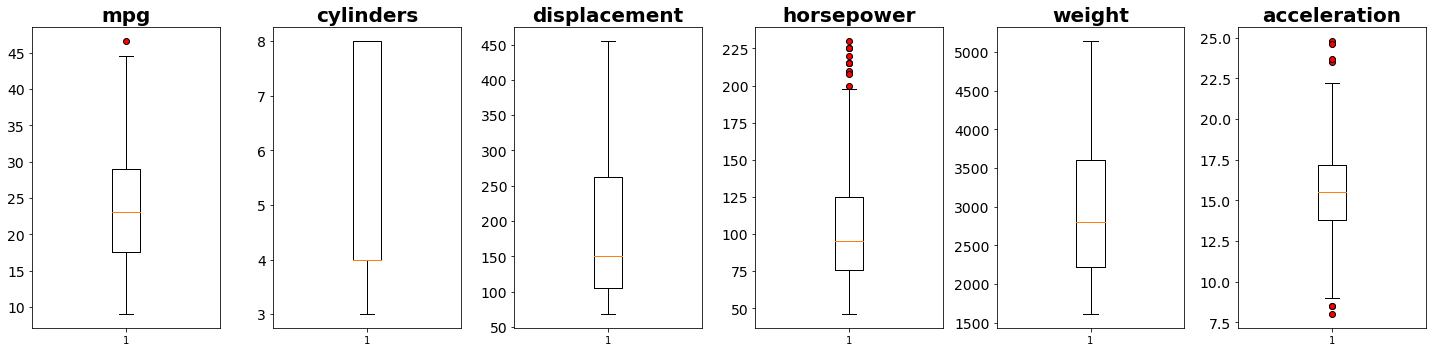

In [18]:
#alternative box plot fuction to Check for outliers
def boxplot_alt(dataset):
    ''' check outiers:'''
    for col in dataset.columns:
        sns.boxplot(x = dataset[col])
        plt.show()
    
boxplot(dataset.drop("mpg01", axis = 1))

## Skewed data vs Not
- Cylinders, displacement, horsepower and weight are skewed
- Acceleration and mpg are not skewed

In [19]:
#5 Number summary
Q1 = dataset.quantile(0.25)
Q2 = dataset.median()
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
# min max
maxVal = dataset.max()
minVal = dataset.min()

fiveNumberSummary = {'Min':minVal, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'Max':maxVal,'IQR':IQR}

IQR
#Using IQR as we need to provide 5 number summary

mpg               11.5
cylinders          4.0
displacement     157.0
horsepower        49.0
weight          1383.0
acceleration       3.4
mpg01              1.0
dtype: float64

In [20]:
#Now we filter out the dataset for its values that fall within this type of range
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

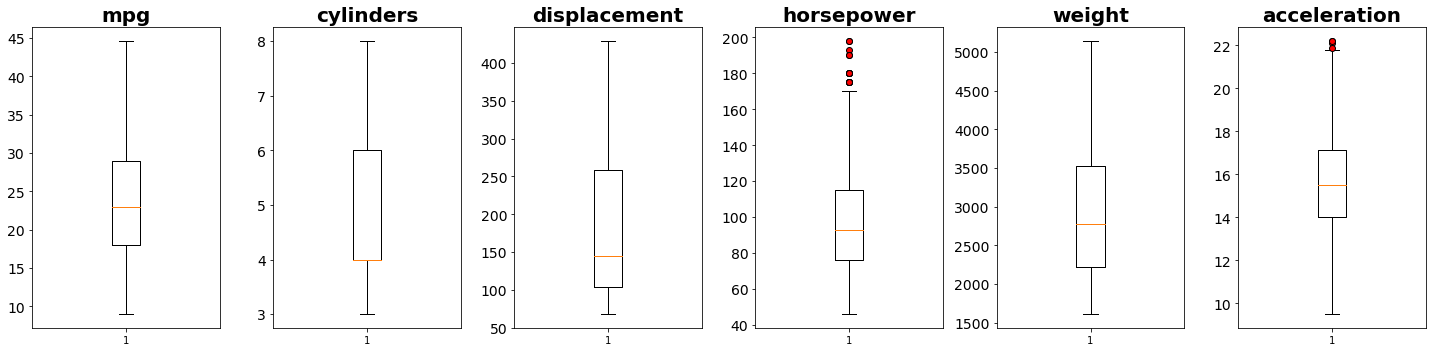

In [21]:
#See what has been removed
boxplot(dataset.drop("mpg01", axis = 1))

In [22]:
#Or simply use the describe function
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg01
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,23.692876,5.390501,187.684697,101.485004,2935.287599,15.641425,0.485488
std,7.517748,1.666830,98.153233,33.084790,822.808202,2.491169,0.500450
min,9.000000,3.000000,68.000000,46.000000,1613.000000,9.500000,0.000000
25%,18.000000,4.000000,104.500000,76.000000,2220.000000,14.000000,0.000000
50%,23.000000,4.000000,145.000000,93.000000,2774.000000,15.500000,0.000000
75%,29.000000,6.000000,258.000000,115.000000,3522.500000,17.150000,1.000000
max,44.600000,8.000000,429.000000,198.000000,5140.000000,22.200000,1.000000


## Distribution of data

In [23]:
#count the number above and below mean
dataset.mpg01.value_counts()

0    195
1    184
Name: mpg01, dtype: int64

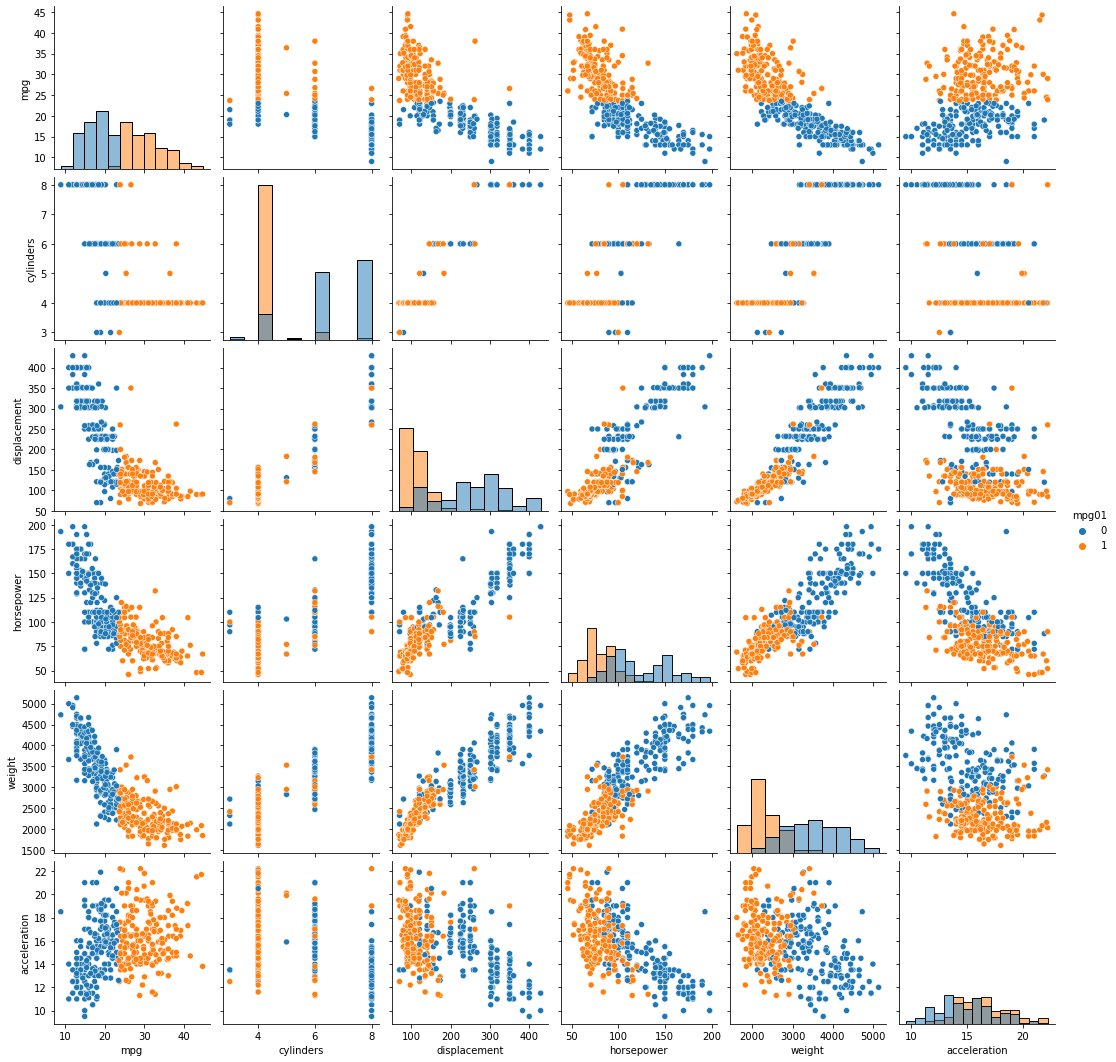

In [24]:
#to see which variable clearly separate the labels
#Note that I dropped mpg because we computed our label from this
sns.pairplot(dataset, hue = "mpg01", diag_kind = "hist")

We definitly need to scale th dataset

# Correlations

<AxesSubplot:>

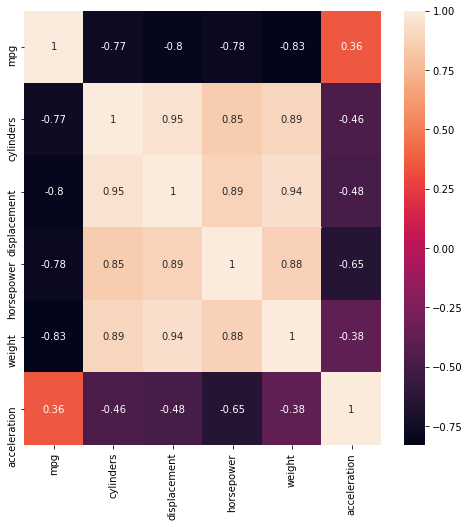

In [25]:
# Getting corrolations and plotting
datacor = dataset.drop("mpg01", axis = 1).corr()
plt.figure(figsize=(8,8))
sns.heatmap(datacor, annot = True)
#Notice that I droped mpg01 because mpg01 is based on mpg data

## Postive Correlations
- Cylinders : displacement, horsepower, weight
- Displacement : cylinders, horsepower, weight
- Horsepower : cylinders, displacement, weight
- Weight : cylinders, displacement, horsepower

## Negative Correlations
- mpg : cylinders, displacement, horsepower, weight


---

# Useful in determining mpg01

## Best Features
These features have high correlations with  mpg
- Cylinders 
- Horsepower 
- Displacement 
- Weight

## Not so good to use
- Acceleration
    

# Splitting data
Using already scaled data

In [26]:
#If you marged the x and y, then you need to seperate themthat Seperate X from Y
#First drop mpg
dataset.drop("mpg", axis = 1, inplace = True)
dataset_X = dataset.iloc[:,:-1].values #every feature but the last
dataset_Y = dataset.iloc[:,-1].values  # the last feature



In [27]:
stdScale = StandardScaler()
#No need for transform as it is all numerical and ready to be inserted
dataset_X = stdScale.fit_transform(dataset_X)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_X, dataset_Y, test_size = 0.3, random_state = 1) #using 70:30 split

In [29]:
print(X_train)

[[-0.83532178 -0.77210643 -0.40812799 -0.65750656  0.94802584]
 [-0.83532178 -0.7006951  -0.04494411 -0.38977611 -0.33820946]
 [ 1.56761525  0.75813641  0.25770912  0.34769959 -0.86074255]
 ...
 [-0.83532178 -0.92513072 -0.40812799 -1.01650876  0.34510304]
 [ 1.56761525  1.32942707  1.16566882  0.97321529 -0.98132711]
 [ 0.36614674  0.63571698 -0.04494411  0.42193395 -0.25781976]]


# Scale data

In [30]:
Y_train

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0])